In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [6]:
# Dataset
clean_data_path = "dataset/autos/autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")

## Vehicle Distribution based on Registration Year

In [8]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313682,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Offer,0,control,Other,2005,manuell,0,...,2694,2016-03-21 10:42:49,2016,2016,March,March,0,10,11,5
313683,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Offer,2200,test,Other,2005,Unspecified,0,...,39576,2016-04-06 00:46:52,2016,2016,March,March,23,0,11,11
313684,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Offer,1199,test,cabrio,2000,automatik,101,...,26135,2016-03-11 18:17:12,2016,2016,March,March,6,18,16,9
313685,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Offer,9200,test,bus,1996,manuell,102,...,87439,2016-04-07 07:15:26,2016,2016,March,March,19,7,20,9


In [9]:
print(df.describe())

               price  yearOfRegistration        powerPS      kilometer  \
count  313687.000000       313687.000000  313687.000000  313687.000000   
mean     3902.961863         2001.909231     109.564250  131435.778340   
std      4168.150636            6.803211     191.741685   34963.149957   
min         0.000000         1910.000000       0.000000    5000.000000   
25%       999.000000         1998.000000      68.000000  125000.000000   
50%      2490.000000         2002.000000     104.000000  150000.000000   
75%      5400.000000         2006.000000     140.000000  150000.000000   
max     28800.000000         2016.000000   20000.000000  150000.000000   

          postalCode  yearOfCreation  yearCrawled  NoOfDaysOnline  \
count  313687.000000   313687.000000     313687.0   313687.000000   
mean    50349.563597     2015.999930       2016.0        8.543274   
std     25765.545682        0.008374          0.0        8.511917   
min      1067.000000     2015.000000       2016.0        

<function matplotlib.pyplot.show(*args, **kw)>

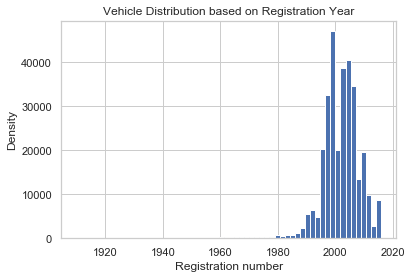

In [34]:
df.yearOfRegistration.hist(bins=60)
plt.xlabel('Registration number')
plt.ylabel('Density')
plt.title('Vehicle Distribution based on Registration Year')
plt.show

In [29]:
# save the plot
fig.savefig("plots/Analise1/vehicle-distribution.png")

## Variation of the price range by type of vehicle

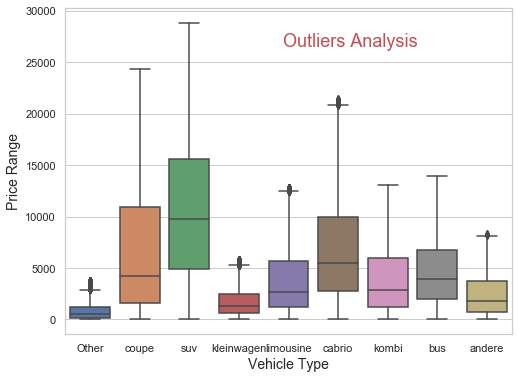

In [35]:
#Create a Boxplot to evaluate outliers
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.text(5.25,27000,"Outliers Analysis",fontsize=18,color="r",ha="center", va="center")
ax.xaxis.set_label_text("Vehicle Type",fontdict= {'size':14})
ax.yaxis.set_label_text("Price Range",fontdict= {'size':14})
plt.show()

In [33]:
# Save the plot
fig.savefig("plots/Analise1/price-vehicleType-boxplot.png")